In [3]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import time
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

In [8]:
music_rat_df = pd.read_json("Digital_Music_5.json", lines = True)
#meta_df = pd.read_json("meta_Digital_Music.json", lines = True)

In [10]:
music_rat_df = music_rat_df[['asin', 'overall', 'reviewText', 'reviewerID', 'reviewerName', 'summary']]

In [11]:
music_rat_df.rename(columns = {'asin':'artist_id', 'overall':'rating', 'reviewerID':'reviewer_id', 'reviewerName':'reviewer_name', 'reviewText':'review_text'}, inplace = True)

In [13]:
music_rat_df.head()

,artist_id,rating,review_text,reviewer_id,reviewer_name,summary
0,5555991584,5,"It's hard to believe ""Memory of Trees"" came ou...",A3EBHHCZO6V2A4,"Amaranth ""music fan""",Enya's last great album
1,5555991584,5,"A clasically-styled and introverted album, Mem...",AZPWAXJG9OJXV,bethtexas,Enya at her most elegant
2,5555991584,5,I never thought Enya would reach the sublime h...,A38IRL0X2T4DPF,bob turnley,The best so far
3,5555991584,5,This is the third review of an irish album I w...,A22IK3I6U76GX0,Calle,Ireland produces good music.
4,5555991584,4,"Enya, despite being a successful recording art...",A1AISPOIIHTHXX,"Cloud ""...""",4.5; music to dream to


In [15]:
us_rat_df = music_rat_df.pivot(index = 'reviewer_id', columns ='artist_id', values = 'rating').fillna(0)
us_rat_df.head()

artist_id,5555991584,B0000000ZW,B00000016T,B00000016W,B00000017R,B0000001P4,B0000002HZ,B0000002J9,B0000002JR,B0000002ME,...,B00II5VHBU,B00IOVH8AW,B00IXZ9QP4,B00J80ED9M,B00JJCQRDE,B00JJOG5D4,B00JRBLSR2,B00JTHVWO8,B00JYKU6BK,B00KILDVEI
reviewer_id,,,,,,,,,,,,,,,,,,,,,
A08161909WK3HU7UYTMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1020L7BWW9RAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10323WWTFPSGP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103KNDW8GN92L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103W7ZPKGOCC9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print ("Number of reviewers: "+ str(len(music_rat_df['reviewer_id'].unique())))
print ("Number of items rated: " + str(len(music_rat_df['artist_id'].unique())))

Number of reviewers: 5541
Number of items rated: 3568


In [17]:
n_unique_users = music_rat_df['reviewer_id'].nunique()
n_unique_items = music_rat_df['artist_id'].nunique()

In [8]:
#Calculate sparsity level of user-rating matrix


<h2> Train Test Split </h2>

In [9]:
users_dictionary = {}
items_dictionary = {}
ci = 0 
cu = 0

for i in range(0, music_data_detailed.shape[0]-1):
    if (items_dictionary.get(music_data_detailed.iloc[i].artist_id) == None):
        items_dictionary.update({ music_data_detailed.iloc[i].artist_id : ci})
        ci+=1
        
    if (users_dictionary.get(music_data_detailed.iloc[i].reviewer_id) == None):
        users_dictionary.update({music_data_detailed.iloc[i].reviewer_id : cu})
        cu+=1

In [10]:
print(len(items_dictionary))
print(len(users_dictionary))

item_val_array = np.fromiter(iter(items_dictionary.values()), dtype=int)
item_val_array = np.sort(item_val_array)

user_val_array = np.fromiter(iter(users_dictionary.values()), dtype = int)
user_val_array = np.sort(user_val_array)

3568
5541


In [11]:
item_val_array

array([   0,    1,    2, ..., 3565, 3566, 3567])

In [12]:
user_val_array

array([   0,    1,    2, ..., 5538, 5539, 5540])

In [13]:
train_data, test_data = train_test_split(music_data_detailed, test_size = 0.25)

<h2> Memory-Based Collaborative Filtering </h2>

In [14]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_unique_users, n_unique_items))
for line in train_data.itertuples():
    train_data_matrix[users_dictionary.get(line[4]), items_dictionary.get(line[1])] = line[2]
    
test_data_matrix = np.zeros((n_unique_users, n_unique_items))
for line in test_data.itertuples():
    test_data_matrix[users_dictionary.get(line[4]), items_dictionary.get(line[1])] = line[2]

In [15]:
user_similarity = pairwise_distances(train_data_matrix, metric = 'cosine')

In [19]:
item_similarity = pairwise_distances(train_data_matrix.T, metric = 'cosine')

In [20]:
def predict(ratings, similarity, type = 'user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis = 1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis = 1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis = 1)])
    return pred

In [21]:
item_prediction = predict(train_data_matrix, item_similarity, type = 'item')
user_prediction = predict(train_data_matrix, user_similarity, type = 'user')

In [32]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [23]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 4.312930350250258
Item-based CF RMSE: 4.326188696903299


SyntaxError: invalid syntax (<ipython-input-5-39236e13ef1a>, line 1)

# Model-based Collaborative Filtering

In [132]:
sparsity=round(1.0-len(music_data_detailed)/float(n_unique_users*n_unique_items),3)
print('The sparsity level of dataset is ' +  str(sparsity*100) + '%')

The sparsity level of dataset is 99.7%


In [149]:
#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 50)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 4.141157987186154


# SVD

In [84]:
r_df = music_data_detailed.pivot(index = 'reviewer_id', columns ='artist_id', values = 'rating').fillna(0)
r_df.head(3)

artist_id,5555991584,B0000000ZW,B00000016T,B00000016W,B00000017R,B0000001P4,B0000002HZ,B0000002J9,B0000002JR,B0000002ME,...,B00II5VHBU,B00IOVH8AW,B00IXZ9QP4,B00J80ED9M,B00JJCQRDE,B00JJOG5D4,B00JRBLSR2,B00JTHVWO8,B00JYKU6BK,B00KILDVEI
reviewer_id,,,,,,,,,,,,,,,,,,,,,
A08161909WK3HU7UYTMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1020L7BWW9RAX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10323WWTFPSGP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
def n_rated_by_user(user_id, row):
    c = 0
    for i in range(0, row.size) :
        if int(row[i])>0:
            c+=1
            
    return c

In [17]:
start = time.time()
n_rated_by_user('A08161909WK3HU7UYTMW', r_df)
r_df.drop('A08161909WK3HU7UYTMW', inplace = True)
end = time.time()
print(end - start)

0.4353330135345459


In [94]:
distribution = np.zeros(r_df.shape[0])

In [95]:
#rr_df = r_df.drop(r_df[(n_rated_by_user(r_df.index[i], r_df) < 5) for i in r_df.index.values].index)
i = 0
for index, row in r_df.iterrows():
    distribution[i] = n_rated_by_user(index, row)
    if distribution[i] < 20:
        r_df.drop(index, inplace = True)
    i+=1

In [127]:
distribution.shape

(5541,)

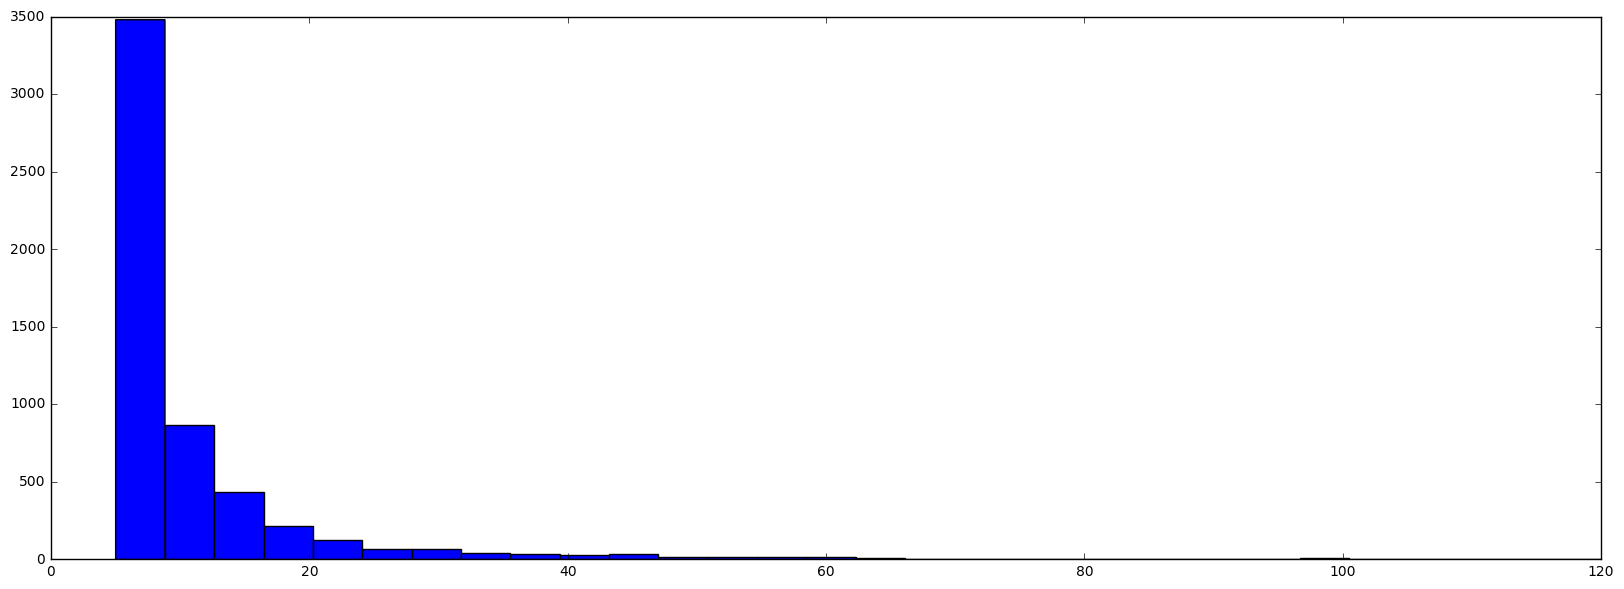

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
plt.xlim(0,120)
plt.hist(distribution.astype(int), bins=150)
plt.show()

In [61]:
train, test = train_test_split(r_df, test_size = 0.25)

In [ ]:
r = train.as_matrix()
user_ratings_mean = np.mean(r, axis = 1)
r_demeaned = r - user_ratings_mean.reshape(-1, 1)

In [80]:
U, sigma, Vt = svds(r_demeaned, k = 12)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [81]:
print('User-based CF MSE: ' + str(rmse(all_user_predicted_ratings, test.as_matrix())))

User-based CF MSE: 4.23297390802323


In [67]:
u, s, vt = svds(train.as_matrix(), k = 100)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test.as_matrix())))

User-based CF MSE: 4.247648597312554


artist_id,5555991584,B0000000ZW,B00000016T,B00000016W,B00000017R,B0000001P4,B0000002HZ,B0000002J9,B0000002JR,B0000002ME,...,B00II5VHBU,B00IOVH8AW,B00IXZ9QP4,B00J80ED9M,B00JJCQRDE,B00JJOG5D4,B00JRBLSR2,B00JTHVWO8,B00JYKU6BK,B00KILDVEI
reviewer_id,,,,,,,,,,,,,,,,,,,,,
AZVH70JMJ2IHX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZVHFS4KQBQTK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWCAUCNLGL4H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZY3MDFJJFI91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYZA8FDL48GD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
r_df.shape

(5541, 3568)

In [61]:
for i in range (0, r_df.shape[0])

578